<a href="https://colab.research.google.com/github/Chiraagkv/ASL/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASL to Text

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kaggle
!mkdir /root/.kaggle/
!touch /root/.kaggle/kaggle.json
!echo '{"username":"tensorflowcolab","key":"key"}' > /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle -h
!kaggle datasets download -d grassknoted/asl-alphabet

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings
 99% 1.01G/1.03G [00:11<00:00, 122MB/s]
100% 1.03G/1.03G [00:11<00:00, 97.2MB/s]


In [ ]:
print("Let's start")

Let's start


In [ ]:
from zipfile import ZipFile


In [ ]:
with ZipFile('/content/drive/MyDrive/Colab Notebooks/person_detection/data/asl-alphabet.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

## Get the Data

In [ ]:
alphabets = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q",
             "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "del", "nothing", "space"])
letters = [f'/content/asl_alphabet_train/asl_alphabet_train/{letter}/' for letter in alphabets]

letters

['/content/asl_alphabet_train/asl_alphabet_train/A/',
 '/content/asl_alphabet_train/asl_alphabet_train/B/',
 '/content/asl_alphabet_train/asl_alphabet_train/C/',
 '/content/asl_alphabet_train/asl_alphabet_train/D/',
 '/content/asl_alphabet_train/asl_alphabet_train/E/',
 '/content/asl_alphabet_train/asl_alphabet_train/F/',
 '/content/asl_alphabet_train/asl_alphabet_train/G/',
 '/content/asl_alphabet_train/asl_alphabet_train/H/',
 '/content/asl_alphabet_train/asl_alphabet_train/I/',
 '/content/asl_alphabet_train/asl_alphabet_train/J/',
 '/content/asl_alphabet_train/asl_alphabet_train/K/',
 '/content/asl_alphabet_train/asl_alphabet_train/L/',
 '/content/asl_alphabet_train/asl_alphabet_train/M/',
 '/content/asl_alphabet_train/asl_alphabet_train/N/',
 '/content/asl_alphabet_train/asl_alphabet_train/O/',
 '/content/asl_alphabet_train/asl_alphabet_train/P/',
 '/content/asl_alphabet_train/asl_alphabet_train/Q/',
 '/content/asl_alphabet_train/asl_alphabet_train/R/',
 '/content/asl_alphabet_trai

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(letters[0]) if isfile(join(letters[0], f))]

ids = []
for pic in onlyfiles:
  for let in alphabets:
    ids.append(pic.replace('.jpg', '')[1:])
len(ids)

87000

In [ ]:
image_paths = []
for letter in letters:
  for id in ids:
    path = letter + alphabets[letters.index(letter)] + id + '.jpg'
    image_paths.append(path)

image_paths

['/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A2443.jpg',
 '/content/asl_alphabet_train/asl_alphabet_train/A/A244

In [ ]:
image_paths = list(set(image_paths))

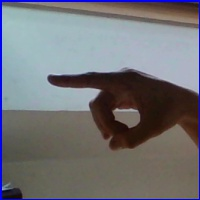

In [ ]:
from IPython.display import Image

Image(image_paths[0])

In [ ]:
idandlabels = []
for image_path in image_paths:
  first_step = image_path.replace('/content/asl_alphabet_train/asl_alphabet_train/', '')
  second_step = first_step.split('/')[1]
  third_step = second_step.replace(".jpg", '')
  idandlabels.append(third_step)

idandlabels[6]

'S893'

In [ ]:
ids_for_df = []
labels_for_df = []
for string in idandlabels:
  id = ''
  label = ''
  for char in string:
    if char.isnumeric():
      id += char
    else:
      label += char
  ids_for_df.append(id)
  labels_for_df.append(label)

labels_for_df[0], ids_for_df[0]

('P', '935')

In [ ]:
labels_df = pd.DataFrame(data={'ids':ids_for_df, 'labels': labels_for_df})
labels_df.head()

,ids,labels
0,935,P
1,123,I
2,2872,P
3,93,Y
4,347,L


In [ ]:
labels_df.tail()

,ids,labels
86995,2402,S
86996,2259,X
86997,1720,R
86998,1015,H
86999,659,W


In [ ]:
# labels_df.sort_values(by=['labels', 'ids'], ignore_index=True, inplace=True)
len(labels_df)

87000

yasssssssss!!!!

In [ ]:
np.array(labels_df.labels)[0] == np.array(alphabets)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

What next:

* convert every label to an array of bools
* Numerically encode them
* Convert the images and batch them up
* Modelling
* Improving
* Deploy

In [ ]:
labels = labels_df['labels']
boolean_labels = [label == alphabets for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]),
 array([False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False])]

In [ ]:
from matplotlib.pyplot import imread

image = imread(image_paths[10000])
image.shape

(200, 200, 3)

In [ ]:
# 224 as the model we are going to use requires it to be so
def process_image(image_path):
  """
  Takes an image path and coverts the image into Tensors
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  
  # Turn the image into numerical tensor with three colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) # the function scales the data from 0-255 to 0-1
  
  # return the image
  return image

def get_labels(image, label):

  image = process_image(image)
  return image, label

get_labels(image_paths[0], tf.constant(labels[0]))

(<tf.Tensor: shape=(200, 200, 3), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.9568628 ],
         [0.        , 0.        , 0.93725497],
         [0.        , 0.        , 0.91372555],
         ...,
         [0.02352941, 0.        , 0.9686275 ],
         [0.        , 0.        , 0.95294124],
         [0.00392157, 0.00392157, 0.9686275 ]],
 
        [[0.        , 0.00392157, 0.9686275 ],
         [0.        , 0.        , 0.87843144],
         [0.01568628, 0.02352941, 0.79215693],
         ...,
         [0.0509804 , 0.00784314, 0.75294125],
         [0.0509804 , 0.03137255, 0.8470589 ],
         [0.02352941, 0.01176471, 0.854902  ]],
 
        [[0.02352941, 0.        , 0.9803922 ],
         [0.01960784, 0.        , 0.8078432 ],
         [0.30588236, 0.30588236, 0.75294125],
         ...,
         [0.25490198, 0.21176472, 0.48235297],
         [0.21568629, 0.18039216, 0.6784314 ],
         [0.0627451 , 0.03529412, 0.6431373 ]],
 
        ...,
 
        [[0.02352941, 0.00784314

In [ ]:
from sklearn.model_selection import train_test_split
SMALL_SIZE = 10000

X = image_paths
y = boolean_labels

X_train, X_val, y_train, y_val = train_test_split(X[:SMALL_SIZE],
                                                  y[:SMALL_SIZE],
                                                  test_size=0.2)

In [ ]:
BATCH_SIZE = 32

def create_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it's validation data.
  Also accepts test data as input (no labels).
  '''

  # If the data is test data, we don't have labels
  if test_data:
    print('Creating test batches...')
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # no labels
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  # if the data is  validation data, we don't need to shuffle the data
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch = data.map(get_labels).batch(batch_size)
    return data_batch
  
  # If neither, it will be training data. We need to shuffle the data
  else:
    print('Creating training data batches...')
    # Turn file paths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))   
    # Shuffle the data
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_labels).batch(batch_size)
    return data_batch

In [ ]:
train_data = create_batches(X_train, y_train)
val_data = create_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...
